## Lecture 7: Introduction to Geospatial analysis using Python tools
### Author: [Nadiia Gorash, UBDC Data Scientist](https://www.ubdc.ac.uk/about-ubdc/who-we-are/team-profiles/data-science-staff/nadiia-gorash/)

### GeoPandas

[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/stable/) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html). 


The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas.

The main difference between geodataframes and pandas dataframes is that a [geodataframe](http://geopandas.org/data_structures.html#geodataframe) contains a column to store geometries. By default, the name of this column is `'geometry'`. 

### Data

The data used in this lab is collected from http://www.adzuna.co.uk/ using [***Adzuna API***](https://developer.adzuna.com/) for UK. 

The data has been subselected to `location_area_1` containing `Scotland` value. 

In [144]:
import pandas as pd
import pyarrow.parquet as pq

In [145]:
source= '../data/adzuna_scotland.parquet'

In [146]:
#open dataset stored in parquet format
df = pq.read_table(source=source).to_pandas()

In [147]:
#Let's check the dataframe
df.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,location_area_0,location_area_1,location_area_2,contract_type,longitude,latitude,location_area_3,location_area_4,location_area_5,scraped_date
86,26480.77,full_time,Boots,Healthcare & Nursing Jobs,healthcare-nursing-jobs,1,Relief Pharmacist – Greater Glasgow,1610439635,Need to know We are looking for a fantastic Ph...,2020-07-21T08:37:58Z,...,UK,Scotland,West Dunbartonshire,None,-4.550980,55.949402,Dumbarton,None,None,21072020
385,16742.00,None,The Best Connection,Logistics & Warehouse Jobs,logistics-warehouse-jobs,0,Mill Operative,1596834392,"We are recruiting for hard working, reliable a...",2020-07-08T06:09:13Z,...,UK,Scotland,Dumfries & Galloway,contract,-3.355940,55.120201,Lockerbie,None,None,21072020
514,17928.62,full_time,Morrisons,Part time Jobs,part-time-jobs,1,SUPPORT PHARMACIST - COWDENBEATH (PART TIME),1610442709,We&rsquo;ve got a fantastic opportunity for a ...,2020-07-21T08:39:32Z,...,UK,Scotland,Fife,None,-3.343290,56.110199,Cowdenbeath,None,None,21072020
850,37047.00,full_time,South Ayrshire,Social work Jobs,social-work-jobs,0,Social Worker (Children & Families) - Whitlett...,1610804167,Job Description What is the role? To promote a...,2020-07-21T14:41:13Z,...,UK,Scotland,South Ayrshire,permanent,-4.607136,55.469722,Ayr,Ayr Central,None,21072020
1030,31800.00,None,NHS National Services Scotland,Healthcare & Nursing Jobs,healthcare-nursing-jobs,0,Midwife - Direct Care - Gracemount Medical Centre,1608261071,NHS Lothian is committed to encouraging equali...,2020-07-18T13:20:27Z,...,UK,Scotland,Midlothian,permanent,-3.202320,55.858501,Penicuik,Milton Bridge,Edinburgh Technopole,21072020


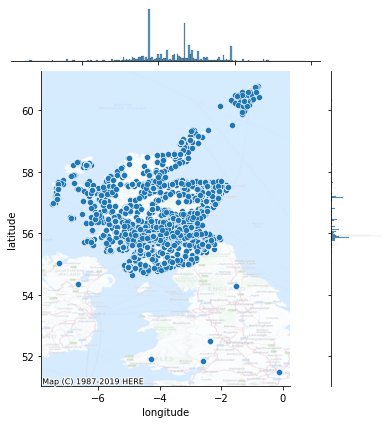

In [148]:
##let's look at the data using seaborn library
import seaborn as sns
import contextily as ctx
# Generate scatter plot

df_plot = sns.jointplot(x='longitude', y='latitude', data=df);
ctx.add_basemap(df_plot.ax_joint, crs="EPSG:4326",
    source=ctx.providers.HERE.normalDay, alpha = 0.4
);

We are going to convert `DataFrame` into `GeoDataframe` to be able to perform geospatial analysis.

The convention is to `import geopandas as gpd`

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/stable/). Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [149]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

 `geopandas.GeoDataFrame(*args, **kwargs)`
A GeoDataFrame object is a pandas.DataFrame that has a column with *geometry*


`geopandas.points_from_xy(x, y, z=None, crs=None) `  Generate `GeometryArray` of shapely Point geometries from x, y(, z) coordinates.

In [150]:
#creating geodataframe

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

In [151]:
#Let's check the GeoDataFrame
gdf.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,location_area_1,location_area_2,contract_type,longitude,latitude,location_area_3,location_area_4,location_area_5,scraped_date,geometry
86,26480.77,full_time,Boots,Healthcare & Nursing Jobs,healthcare-nursing-jobs,1,Relief Pharmacist – Greater Glasgow,1610439635,Need to know We are looking for a fantastic Ph...,2020-07-21T08:37:58Z,...,Scotland,West Dunbartonshire,None,-4.550980,55.949402,Dumbarton,None,None,21072020,POINT (-4.55098 55.94940)
385,16742.00,None,The Best Connection,Logistics & Warehouse Jobs,logistics-warehouse-jobs,0,Mill Operative,1596834392,"We are recruiting for hard working, reliable a...",2020-07-08T06:09:13Z,...,Scotland,Dumfries & Galloway,contract,-3.355940,55.120201,Lockerbie,None,None,21072020,POINT (-3.35594 55.12020)
514,17928.62,full_time,Morrisons,Part time Jobs,part-time-jobs,1,SUPPORT PHARMACIST - COWDENBEATH (PART TIME),1610442709,We&rsquo;ve got a fantastic opportunity for a ...,2020-07-21T08:39:32Z,...,Scotland,Fife,None,-3.343290,56.110199,Cowdenbeath,None,None,21072020,POINT (-3.34329 56.11020)
850,37047.00,full_time,South Ayrshire,Social work Jobs,social-work-jobs,0,Social Worker (Children & Families) - Whitlett...,1610804167,Job Description What is the role? To promote a...,2020-07-21T14:41:13Z,...,Scotland,South Ayrshire,permanent,-4.607136,55.469722,Ayr,Ayr Central,None,21072020,POINT (-4.60714 55.46972)
1030,31800.00,None,NHS National Services Scotland,Healthcare & Nursing Jobs,healthcare-nursing-jobs,0,Midwife - Direct Care - Gracemount Medical Centre,1608261071,NHS Lothian is committed to encouraging equali...,2020-07-18T13:20:27Z,...,Scotland,Midlothian,permanent,-3.202320,55.858501,Penicuik,Milton Bridge,Edinburgh Technopole,21072020,POINT (-3.20232 55.85850)


In [152]:
print(gdf.crs)

None


### Map Projections and CRS

Map projections try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data. [Source](https://docs.qgis.org/3.16/en/docs/gentle_gis_introduction/coordinate_reference_systems.html#)

![Distortions of the surface using different projections](../images/map_projections.png)
[Source](http://bl.ocks.org/vlandham/raw/9216751/)

Another example

![Another Example](../images/sinucyli-animation.gif)

[Source](https://blog.map-projections.net/the-sinucyli-projection)

We are going to set coordinates to WGS84 (lon/lat) using `set_crs` and a EPSG (European Petroleum Survey Group) code  `epsg` of the coornate system. 

In [153]:
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

epsg:4326


**More about CRS**  

- https://spatialreference.org/ref/epsg/ 
- https://proj.org/operations/projections/

### Visualisation

Let's visualise and  explore the  data on the map. Geopandas  uses matplotlib library for plotting data. Similarly to plotting `DataFrame`, to create a baic map from a `GeoDataFrame`  use ``.plot()``

**This function in GeoPandas creates a map based on the geometry columna**. 


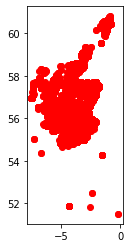

In [154]:
# plot the GeoDataFrame
gdf.plot( color='red')

plt.show()

### Open different file formats of spatial data

We are going to load boundary of Scotland to remove outliers using free OS data [BoundaryLine](https://www.ordnancesurvey.co.uk/business-government/products/boundaryline)


Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command `geopandas.read_file()`  which returns a GeoDataFrame object.
[More info](https://geopandas.org/io.html)

In [155]:
os_data=gpd.read_file('../data/district_borough_unitary.shp')

#if loading full dataset use this: 
#os_data = gpd.read_file("bdline_gb.gpkg", layer='bdline_gb district_borough_unitary')

In [156]:
#check the CRS
os_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

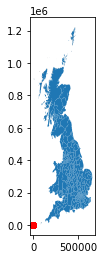

In [157]:
#Visualisation of the data
ax1 = os_data.plot()

## adding both datasets together
gdf.plot( color='red',ax = ax1)

plt.show()

Firstly, let's make the plot bigger and fix projection issue using [`to_crs`]( https://geopandas.org/reference.html#geopandas.GeoDataFrame.to_crs)

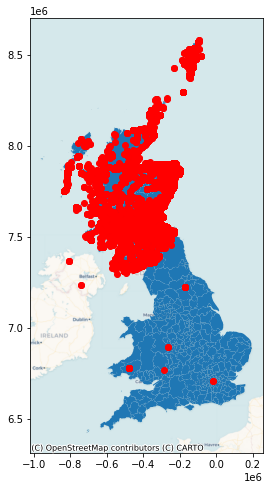

In [158]:
fig, ax = plt.subplots(figsize=(12,8))

#Reprojecting to align with background mapping,hence using webmerkator
os_data = os_data.to_crs(epsg= 3857)

# Plot the data
os_data.plot(ax=ax)
gdf.to_crs(epsg = 3857).plot(color = 'red',ax=ax)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

**N.B.** both layers could have been projected to the same projection and then the same projection code could have been added to contextily as a parameter


```python
fig, ax = plt.subplots(figsize=(12,8)) 
#Plot the data
os_data.to_crs(epsg =4326).plot(ax=ax)
gdf.plot(color = 'red',ax=ax)
#Add basemap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager)
```
expected output
![image](../images/ctx_4326_expected_output.png)

Full list of available backgrounds

```python
ctx.providers.keys()
```

<span style="font-family:Courier New"><span style="color:gray">'OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG' </span></span>

```python 
ctx.providers.KEYNAME.keys()
```

Example provider **HERE**

<span style="font-family:Courier New"><span style="color:gray">'normalDay', 'normalDayCustom', 'normalDayGrey', 'normalDayMobile', 'normalDayGreyMobile', 'normalDayTransit', 'normalDayTransitMobile', 'normalNight', 'normalNightMobile', 'normalNightGrey', 'normalNightGreyMobile', 'normalNightTransit', 'normalNightTransitMobile', 'reducedDay', 'reducedNight', 'basicMap', 'mapLabels', 'trafficFlow', 'carnavDayGrey', 'hybridDay', 'hybridDayMobile', 'hybridDayTransit', 'hybridDayGrey', 'pedestrianDay', 'pedestrianNight', 'satelliteDay', 'terrainDay', 'terrainDayMobile'</span></span>

### Spatial Join 

[More info](https://geopandas.org/mergingdata.html#spatial-joins)

In [159]:
#removing outliers by selecting only those inside the scotland

#Firslty let's look at the data
os_data.head()

,fid,Name,Area_Code,Area_Descr,File_Name,Feature_Se,Collection,Global_Pol,Admin_Unit,Census_Cod,Hectares,Non_Inland,Area_Type_,Area_Typ_1,Non_Area_T,Non_Area_1,geometry
0,1.0,Barnsley District (B),MTD,Metropolitan District,BARNSLEY_DISTRICT_(B),1,1,50242,9182,E08000016,32907.759,0.0,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-200538.815 7072468.726, -200533.754..."
1,2.0,Bolton District (B),MTD,Metropolitan District,BOLTON_DISTRICT_(B),2,2,56602,18832,E08000001,13979.204,0.0,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-262089.348 7080937.661, -262092.884..."
2,3.0,Bradford District (B),MTD,Metropolitan District,BRADFORD_DISTRICT_(B),3,3,61045,16726,E08000032,36641.974,0.0,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-218154.613 7129405.155, -218171.170..."
3,4.0,Bury District (B),MTD,Metropolitan District,BURY_DISTRICT_(B),4,4,56616,18846,E08000002,9946.013,0.0,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-260957.224 7084571.047, -260959.266..."
4,5.0,Calderdale District (B),MTD,Metropolitan District,CALDERDALE_DISTRICT_(B),5,5,61033,16714,E08000033,36396.099,0.0,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-226077.293 7100249.158, -226064.175..."


In [160]:
# Select Glasgow data
glasgow = os_data.loc[os_data['Name']=='Glasgow City']
glasgow

,fid,Name,Area_Code,Area_Descr,File_Name,Feature_Se,Collection,Global_Pol,Admin_Unit,Census_Cod,Hectares,Non_Inland,Area_Type_,Area_Typ_1,Non_Area_T,Non_Area_1,geometry
104,105.0,Glasgow City,UTA,Unitary Authority,GLASGOW_CITY,105,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((-475646.641 7544253.572, -475573.990..."


<AxesSubplot:>

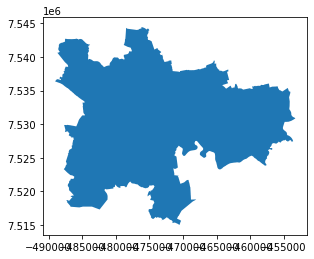

In [161]:
#plot glasgow GeoDataFrame
glasgow.plot()

In [162]:
#check crs
glasgow.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [163]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [212]:
# origin code below

join = gpd.sjoin(gdf.to_crs = 3857, glasgow, how="inner", op="within")

SyntaxError: keyword can't be an expression (<ipython-input-212-b0c5410baf6d>, line 3)

In [208]:
join = (gdf.to_crs(epsg=3857,inplace = True), Glasgow, how='inner', op='within')

SyntaxError: invalid syntax (<ipython-input-208-84636f26d45b>, line 1)

In [180]:
# Make a spatial join
join = gpd.sjoin(gdf.to_crs(epsg=3857,inplace = True), glasgow, how='inner', op='within')

#What do you think caused an error?

ValueError: 'left_df' should be GeoDataFrame, got <class 'NoneType'>

In [169]:
type(glasgow)

geopandas.geodataframe.GeoDataFrame

In [202]:
gdf.dtypes

salary_min                float64
contract_time              object
company_display_name       object
category_label             object
category_tag               object
salary_is_predicted         int64
title                      object
id                          int64
description                object
created                    object
adref                      object
salary_max                float64
location_display_name      object
location_area_0            object
location_area_1            object
location_area_2            object
contract_type              object
longitude                 float64
latitude                  float64
location_area_3            object
location_area_4            object
location_area_5            object
scraped_date                int64
geometry                 geometry
dtype: object

In [203]:
join.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,Collection,Global_Pol,Admin_Unit,Census_Cod,Hectares,Non_Inland,Area_Type_,Area_Typ_1,Non_Area_T,Non_Area_1


/Users/wisnuimamtyasha/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

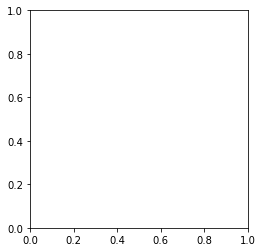

In [204]:
#Plot the joined data
join.plot()

In [ ]:
len(join)

In [205]:
#examine what's inside
join.describe()

,salary_min,salary_is_predicted,id,salary_max,longitude,latitude,scraped_date,index_right,fid,Feature_Se,Collection,Global_Pol,Admin_Unit,Hectares,Non_Inland
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# demo that GeoDataFrame could be manipulated as DataFrame
#most popular category of jobs
join.groupby('category_label')['salary_min'].mean().reset_index().sort_values(by='salary_min')

,category_label,salary_min


### geoplot : geospatial data viz
[geoplot](https://residentmario.github.io/geoplot/index.html)

In [200]:
import geoplot

/Users/wisnuimamtyasha/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/geoplot/crs.py:79: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

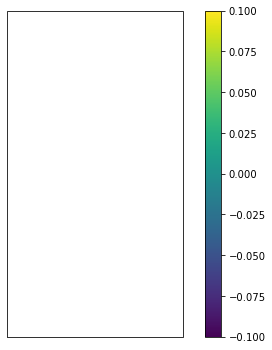

In [201]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True, 
    edgecolor='lightgray', linewidth=0.5
)

[**mapclassify**](https://pysal.org/notebooks/viz/mapclassify/intro.html)  to classify data and aplly classification schemes for Choropleth Maps 

In [ ]:
import mapclassify as mc
scheme = mc.Quantiles(join['salary_min'])

In [ ]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True,
    edgecolor='lightgray', linewidth=0.5, scheme=scheme
)

### Clip

`geopandas.clip(gdf, mask, keep_geom_type=False)`
Clip points, lines, or polygon geometries to the mask extent.

Both layers must be in the same Coordinate Reference System (CRS). The gdf will be clipped to the full extent of the clip object.

If there are multiple polygons in mask, data from gdf will be clipped to the total boundary of all polygons in mask.

In [171]:
print(glasgow.crs)
print(gdf.crs)

epsg:3857
epsg:3857


In [172]:
#Let's reproject both layers to WebMerkator

gdf.to_crs(epsg=3857,inplace=True)
#glasgow.to_crs(epsg =)

In [173]:
clipped = gpd.clip(gdf, glasgow)

In [174]:
print(len(clipped))

3736


In [175]:
clipped.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,location_area_1,location_area_2,contract_type,longitude,latitude,location_area_3,location_area_4,location_area_5,scraped_date,geometry
22709,34866.10,None,Ashurst,IT Jobs,it-jobs,1,Data Analyst,1610942278,About Ashurst: Ashurst is a leading global law...,2020-07-21T17:18:08Z,...,Scotland,Glasgow,permanent,-4.151502,55.854616,Springboig,None,None,21072020,POINT (-462143.089 7529528.085)
28484,26121.94,None,Dentons,Legal Jobs,legal-jobs,1,"Contract Analyst (Paralegal), Commercial - Gla...",1610942368,Purpose of role An exciting opportunity has ar...,2020-07-21T17:18:19Z,...,Scotland,Glasgow,permanent,-4.151502,55.854616,Springboig,None,None,21072020,POINT (-462143.089 7529528.085)
61760,54337.07,None,RX+ Medical,Healthcare & Nursing Jobs,healthcare-nursing-jobs,1,ST3 - General Medical (Non-Cons),1588810059,RX Medical is seeking a qualified doctor to fi...,2020-06-30T15:56:10Z,...,Scotland,Glasgow,None,-4.322786,55.883691,Whiteinch,None,None,21072020,POINT (-481210.336 7535296.580)
76322,15763.00,full_time,Search Consultancy LTD,Customer Services Jobs,customer-services-jobs,0,Customer Service Advisor,1603084362,Inbound customer service advisor Hours availab...,2020-07-14T12:11:09Z,...,Scotland,Glasgow,contract,-4.258975,55.862864,Glasgow City Centre,Hillhead,None,22072020,POINT (-474106.928 7531164.053)
84629,71701.62,None,MORGAN STANLEY,IT Jobs,it-jobs,1,Cyber Security Response Manager,1612006355,Job Description - Cyber Security Response Mana...,2020-07-22T15:35:15Z,...,Scotland,Glasgow,None,-4.322786,55.883691,Whiteinch,None,None,27072020,POINT (-481210.336 7535296.580)


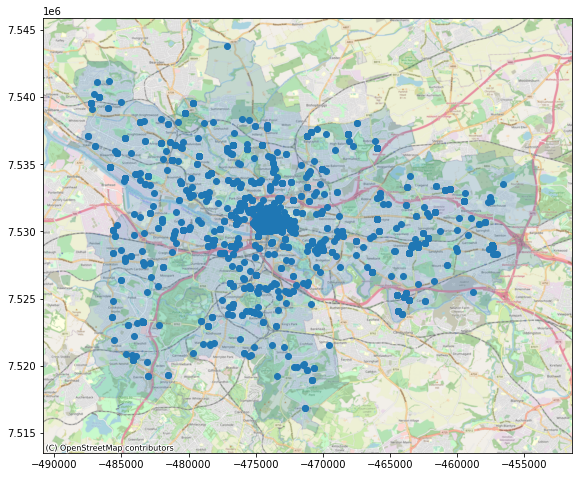

In [176]:
fig, ax1 = plt.subplots(figsize=(12,8))
# Plot the data
clipped.plot(ax=ax1)
glasgow.plot(ax=ax1,alpha=0.2 )
# Add basemap
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

In [177]:
assert len(clipped) == len(join)

AssertionError: 

The extent of a plot is the span of its axes. In `geoplot` it is formatted as a tuple of (_min_longitude, min_latitude, max_longitude, max_latitude_). 

For example, a plot covering the entire world would have a span of (-180, -180, 180, 180).

In [178]:
clipped_wgs84 = clipped.to_crs(epsg = 4326)


<AxesSubplot:>

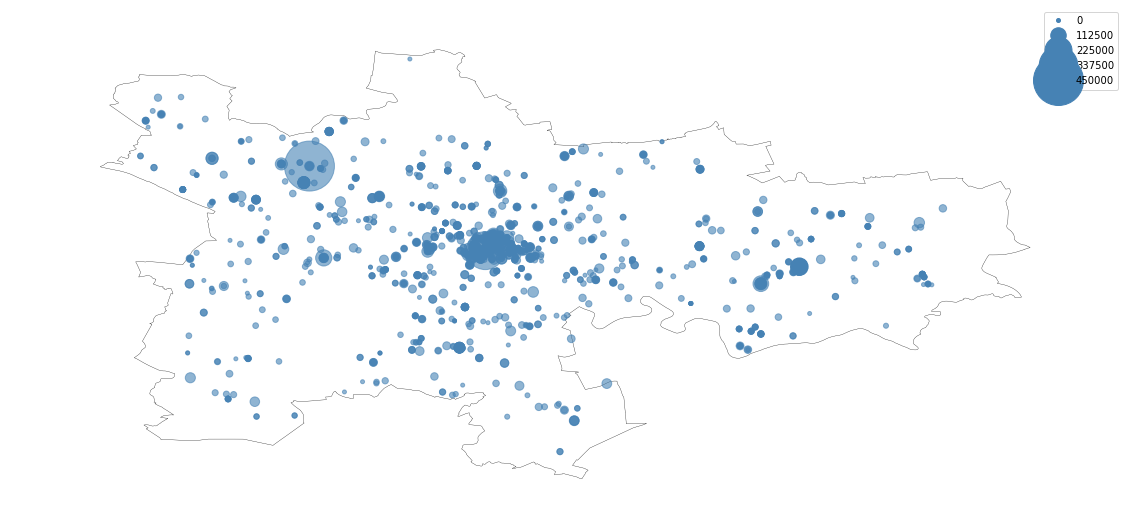

In [179]:
ax = geoplot.pointplot(
    clipped_wgs84, 
    scale='salary_min', limits=(4, 50),
    figsize=(20,12), alpha = 0.6, legend = True
)
geoplot.polyplot(glasgow.to_crs(epsg=4326), linewidth=0.3,ax=ax)

## Tranformation between GeoDataFrame and DataFrame


Data used is [DataZone boundaries](https://data.gov.uk/dataset/ab9f1f20-3b7f-4efa-9bd2-239acf63b540/data-zone-boundaries-2011) which was converted to geojson and clipped for Glasgow for this exercise.

In [183]:
#opening dz

dz=gpd.read_file('../data/dz_glasgow.geojson')

In [184]:
#check crs
dz.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [185]:
#let's double check what gdf (advert data) is
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [186]:
#Let's convert gdf to the same crs as dz
gdf.to_crs(epsg=27700,inplace=True)

<AxesSubplot:>

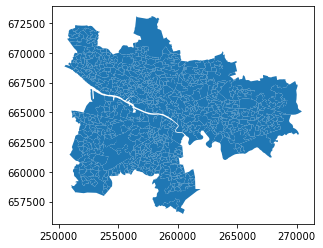

In [187]:
#Plot dz GeoDataFrame
dz.plot()

In [188]:
# Make a spatial join
dz_join = gpd.sjoin(gdf.to_crs(epsg=27700), dz, op="within")

In [189]:
#Let's hvae a look at the data
dz.head()

,DataZone,Name,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,city_name,geometry
0,S01009758,Darnley East - 01,598,547,242,7.849029,0.078491,1474.152028,78490.309008,Glasgow,"MULTIPOLYGON (((254366.687 658648.165, 254302...."
1,S01009759,Darnley East - 02,934,927,417,13.609150,0.136092,2170.701472,136091.515542,Glasgow,"MULTIPOLYGON (((254197.000 660082.000, 254187...."
2,S01009760,Darnley East - 03,893,893,407,33.234507,0.332345,3057.747139,332345.088422,Glasgow,"MULTIPOLYGON (((254419.100 659330.500, 254431...."
3,S01009761,Darnley East - 04,910,910,377,15.607803,0.156078,2761.244322,156078.015080,Glasgow,"MULTIPOLYGON (((254085.000 658830.000, 254073...."
4,S01009762,Darnley East - 05,926,921,416,15.073786,0.150739,2295.018993,150737.851165,Glasgow,"MULTIPOLYGON (((253971.926 659497.041, 253975...."


In [190]:
#Let's find average salary advertised per DataZone
salaries = dz_join.groupby('Name')['salary_min'].mean().reset_index()

In [191]:
salaries.head()

,Name,salary_min
0,Alexandra Parade - 02,31290.4300
1,Anderston - 01,36589.3325
2,Anderston - 02,21946.6900
3,Anderston - 04,61590.0000
4,Anderston - 05,24913.9100


In [192]:
salaries.rename(columns={'salary_min':'salary_mean'},inplace= True)

In [193]:
#Let's join GeoDataFrame dz with DataFrame salaries based on DataZone name
salaries_dz = pd.merge(salaries, dz, on='Name')

In [194]:
#Let's have a look at the data
salaries_dz.head()

,Name,salary_mean,DataZone,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,city_name,geometry
0,Alexandra Parade - 02,31290.4300,S01010240,691,691,398,4.092162,0.040921,977.399344,40921.623800,Glasgow,"MULTIPOLYGON (((261786.235 665684.179, 261767...."
1,Anderston - 01,36589.3325,S01010276,993,993,625,24.092175,0.240921,2584.611012,240921.717787,Glasgow,"MULTIPOLYGON (((257546.000 665352.000, 257618...."
2,Anderston - 02,21946.6900,S01010277,610,610,305,11.881241,0.118813,2423.454624,118812.417480,Glasgow,"MULTIPOLYGON (((257659.999 665609.999, 257662...."
3,Anderston - 04,61590.0000,S01010279,605,605,312,4.895779,0.048958,2208.696592,48957.781355,Glasgow,"MULTIPOLYGON (((257304.733 665774.109, 257237...."
4,Anderston - 05,24913.9100,S01010280,783,782,426,9.580797,0.095807,2072.370863,95807.966249,Glasgow,"MULTIPOLYGON (((257959.000 666014.000, 257958...."


In [195]:
#Let's check the type of salaries_dz
print(type(salaries_dz))

<class 'pandas.core.frame.DataFrame'>


In [196]:
salaries_dz_gdf = gpd.GeoDataFrame(salaries_dz,geometry = 'geometry')

<AxesSubplot:>

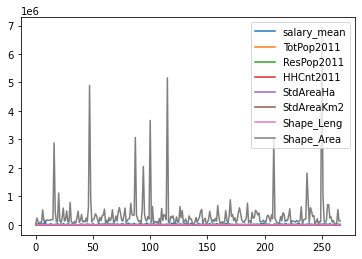

In [197]:
#Plot salaries_dz
salaries_dz.plot()

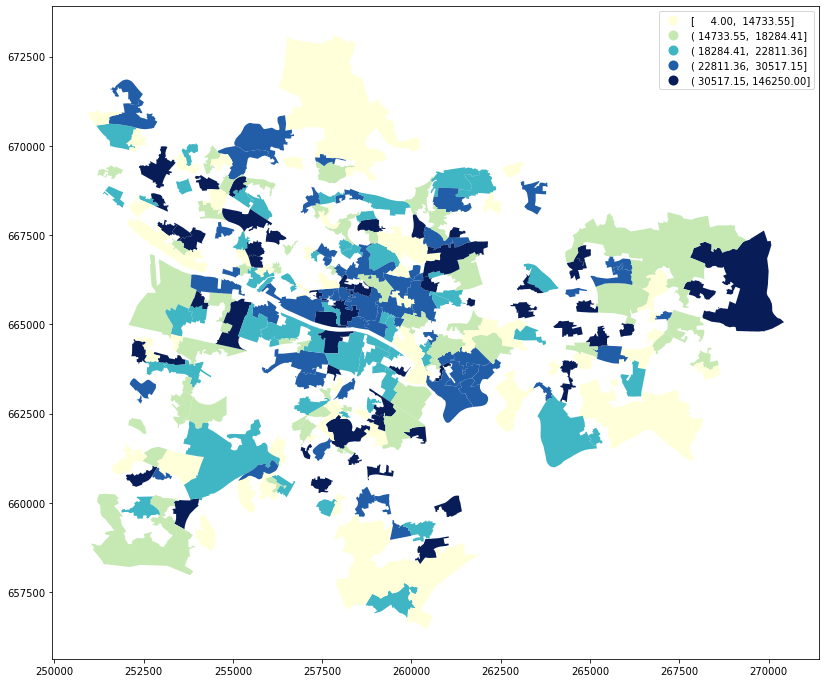

In [198]:
#Choropleth mapping (! not normalised data)
salaries_dz_gdf.plot(column='salary_mean', cmap =    
                                'YlGnBu', figsize=(20,12),   
                                 scheme='quantiles', k=5, legend =  
                                  True);

[Colourmaps](https://matplotlib.org/tutorials/colors/colormaps.html)

<AxesSubplot:>

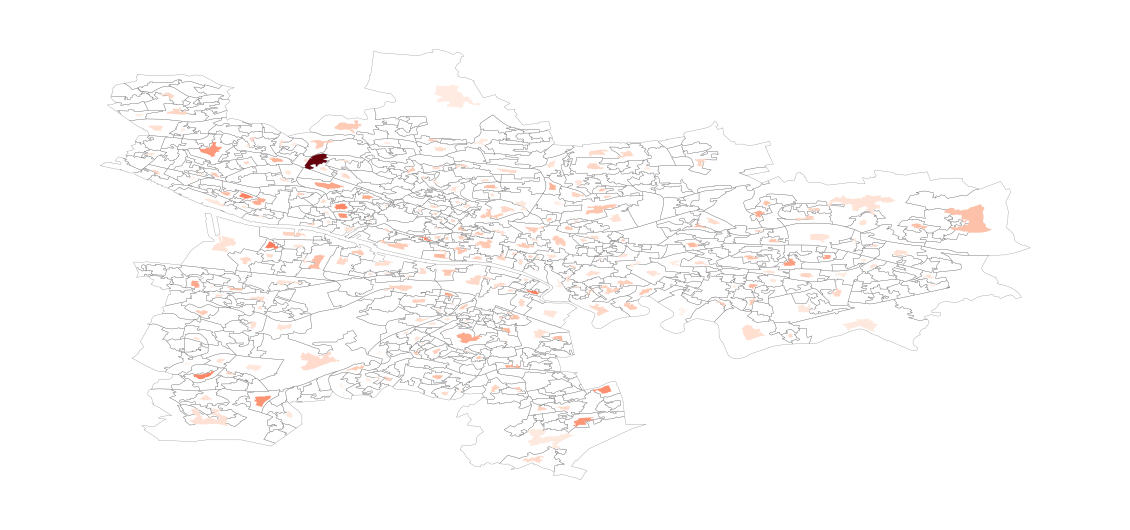

In [199]:
#Cartogram with geoplot
ax2 = geoplot.cartogram(
    salaries_dz_gdf.to_crs(epsg=4326), scale='salary_mean',
    edgecolor='None', hue='salary_mean', cmap='Reds',
    figsize=(20, 12)
)

geoplot.polyplot(dz.to_crs(epsg=4326), edgecolor='grey',linewidth = 0.3, zorder=0, ax=ax2)

### Data export

`GeoDataFrame.to_file(self, filename, driver='ESRI Shapefile', schema=None, index=None, **kwargs)`

Write the GeoDataFrame to a file. By default, an ESRI shapefile is written, but any OGR data source supported by Fiona can be written.


>GeoDataFrame can contain more field types than supported by most of the file formats. For example tuples or lists can be easily stored in the GeoDataFrame, but saving them to e.g. GeoPackage or Shapefile will raise a ValueError. Before saving to a file, they need to be converted to a format supported by a selected driver.

 [More info about data outputs](https://geopandas.org/io.html)

In [207]:
clipped.to_file("adzuna_glasgow.shp")